<a href="https://colab.research.google.com/github/svetazo060510/goit-numpr-hw-03/blob/main/HW3_StremedlovskaS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання Тема 3

In [2]:
import pandas as pd
import numpy as np
import pickle
import gdown
import matplotlib.pyplot as plt
import plotly.express as px
from numpy import dot
from numpy.linalg import norm
from sklearn.decomposition import PCA

In [3]:
# ==========================================================
# ЗАВАНТАЖЕННЯ ФАЙЛУ ЗА ПОСИЛАННЯМ
# ==========================================================
file_id = '1281E0CDneuKdflWFBUvuyUzujpdGVImz'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'word_embeddings_subset.p'

gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1281E0CDneuKdflWFBUvuyUzujpdGVImz
To: /content/word_embeddings_subset.p
100%|██████████| 309k/309k [00:00<00:00, 82.4MB/s]


'word_embeddings_subset.p'

In [4]:
# Відкриваємо файл через pickle
with open(output, 'rb') as f:
    word_embeddings = pickle.load(f)

all_words = list(word_embeddings.keys())

In [5]:
# ==========================================================
# ПЕРЕВІРКА ДАНИХ
# ==========================================================
print("\n" + "="*30)
print("ПЕРЕВІРКА МОДЕЛІ")
print("="*30)

print(f"Кількість слів у моделі: {len(word_embeddings)}")

# Беремо перше слово для перевірки розмірності
first_word = list(word_embeddings.keys())[0]
print(f"Розмірність векторів: {word_embeddings[first_word].shape[0]}")

print('\nПриклади слів у словнику (перші 50):')
all_words = list(word_embeddings.keys())
print(all_words[:50])
print("="*30 + "\n")


ПЕРЕВІРКА МОДЕЛІ
Кількість слів у моделі: 243
Розмірність векторів: 300

Приклади слів у словнику (перші 50):
['country', 'city', 'China', 'Iraq', 'oil', 'town', 'Canada', 'London', 'England', 'Australia', 'Japan', 'Pakistan', 'Iran', 'gas', 'happy', 'Russia', 'Afghanistan', 'France', 'Germany', 'Georgia', 'Baghdad', 'village', 'Spain', 'Italy', 'Beijing', 'Jordan', 'Paris', 'Ireland', 'Turkey', 'Egypt', 'Lebanon', 'Taiwan', 'Tokyo', 'Nigeria', 'Vietnam', 'Moscow', 'Greece', 'Indonesia', 'sad', 'Syria', 'Thailand', 'Libya', 'Zimbabwe', 'Cuba', 'Ottawa', 'Tehran', 'Sudan', 'Kenya', 'Philippines', 'Sweden']



In [6]:
# ==========================================================
# ПІДГОТОВКА DATAFRAME ТА PCA (3D)
# ==========================================================
# Отримуємо 300-вимірні вектори
vectors_300d = np.array([word_embeddings[word] for word in all_words])

# Для 3D аналізу (векторний добуток)
pca_3d = PCA(n_components=3)
vectors_3d = pca_3d.fit_transform(vectors_300d)
df_3d = pd.DataFrame(vectors_3d, index=all_words, columns=['x', 'y', 'z'])

# Для 2D візуалізації
pca_2d = PCA(n_components=2)
vectors_2d = pca_2d.fit_transform(vectors_300d)
df_2d = pd.DataFrame(vectors_2d, index=all_words, columns=['x', 'y'])


# Створюємо DataFrame з тривимірними векторами
print("DataFrame з 3D векторами створено. Перші 5 рядків:")
print(df_3d.head())

DataFrame з 3D векторами створено. Перші 5 рядків:
                x         y         z
country  0.746037 -0.387964 -0.482691
city     0.102492  0.140384 -1.189891
China    0.831055 -0.129500 -0.312599
Iraq     0.656337 -0.177791 -0.338381
oil      0.658345 -0.432464 -0.621213


In [7]:
# ==========================================================
# ФУНКЦІЇ ДЛЯ АНАЛІЗУ (пошуку найближчого слова, визначення кута між словами)
# ==========================================================
def find_top_k_closest(v, dataframe, k=2):
    """
    Знаходить K найближчих слів до вектора v.
    """
    diff = dataframe.values - v
    distances = norm(diff, axis=1)

    # Отримуємо індекси, відсортовані за відстаню
    sorted_indices = np.argsort(distances)

    results = []
    for i in range(k):
        idx = sorted_indices[i]
        results.append((dataframe.index[idx], distances[idx]))

    return results

def calculate_angle(w1, w2, dataframe):
    """
    Обчислює кут у градусах між векторами двох слів через скалярний добуток.
    """
    v1 = dataframe.loc[w1].values
    v2 = dataframe.loc[w2].values

    # cos(theta) = (v1 · v2) / (|v1| * |v2|)
    cos_theta = dot(v1, v2) / (norm(v1) * norm(v2))

    # Використовуємо clip для уникнення помилок точності
    angle_rad = np.arccos(np.clip(cos_theta, -1.0, 1.0))
    return np.degrees(angle_rad)

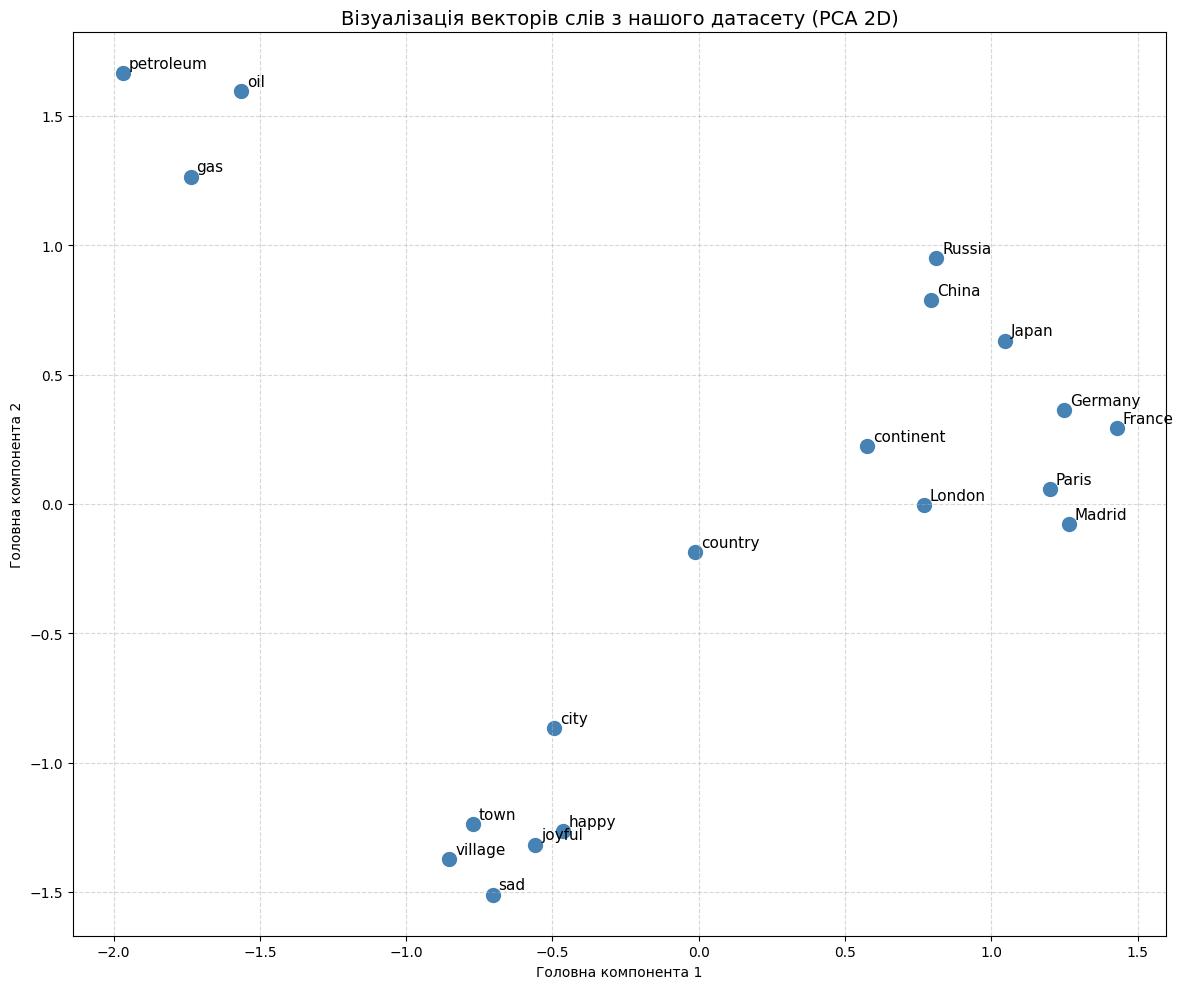

In [8]:
# ==========================================================
# ВІЗУАЛІЗАЦІЯ
# ==========================================================
# Вибираємо слова з нашого датасету
words_to_visualize = [
    # Енергетика
    'oil', 'gas', 'petroleum',
    # Емоції
    'happy', 'joyful', 'sad',
    # Місця
    'city', 'town', 'village', 'country', 'continent',
    # Країни та столиці
    'China', 'Japan', 'Russia', 'France', 'Germany', 'London', 'Paris', 'Madrid'
]

# Фільтруємо список на випадок, якщо якесь слово відсутнє в завантаженій моделі
available_words = [w for w in words_to_visualize if w in word_embeddings]
vectors = np.array([word_embeddings[w] for w in available_words])

# Зменшення розмірності до 2D
pca_2d = PCA(n_components=2)
reduced_vectors = pca_2d.fit_transform(vectors)

# Побудова графіка
plt.figure(figsize=(12, 10))

for i, word in enumerate(available_words):
    # Малюємо точку
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], color='steelblue', s=100)
    # Додаємо підпис з невеликим зміщенням
    plt.text(reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1] + 0.02, word, fontsize=11)

plt.title("Візуалізація векторів слів з нашого датасету (PCA 2D)", fontsize=14)
plt.xlabel("Головна компонента 1")
plt.ylabel("Головна компонента 2")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [10]:
# ==========================================================
# ВИКОНАННЯ ТЕСТОВИХ ЗАВДАНЬ
# ==========================================================
# --- Крок 1: Підготовка ---
print(f"Крок 1: DataFrame з тривимірними векторами успішно створено.")
print(f"Розмірність таблиці: {df_3d.shape} (слова x координати)")

# --- Крок 2: Пошук найближчого слова ---
target_word = 'China'
top_results = find_top_k_closest(df_3d.loc[target_word].values, df_3d, k=2)

print(f"\nКрок 2: Тестування пошуку для '{target_word}'")
print(f"1-й результат (саме слово): '{top_results[0][0]}' (dist: {top_results[0][1]:.4f})")
print(f"2-й результат (найближчий сусід): '{top_results[1][0]}' (dist: {top_results[1][1]:.4f})")

# --- Крок 3: Векторний добуток ---
w1, w2 = 'oil', 'gas'
v_cross = np.cross(df_3d.loc[w1].values, df_3d.loc[w2].values)
ortho_word, _ = find_top_k_closest(v_cross, df_3d)
print(f"\nКрок 3: Векторний добуток (Ортогональність)")
print(f"Результат '{w1}' x '{w2}' вказує на слово: '{ortho_word}'")

# --- Крок 4: Аналіз кутів ---
print("\nКрок 4: Аналіз семантичних кутів:")
angle_pairs = [('happy', 'joyful'), ('happy', 'sad'), ('oil', 'city'), ('Germany', 'London'), ('London', 'Paris'), ('petroleum', 'happy')]
for p1, p2 in angle_pairs:
    angle = calculate_angle(p1, p2, df_3d)
    print(f" - Кут між '{p1}' та '{p2}': {angle:.2f}°")

Крок 1: DataFrame з тривимірними векторами успішно створено.
Розмірність таблиці: (243, 3) (слова x координати)

Крок 2: Тестування пошуку для 'China'
1-й результат (саме слово): 'China' (dist: 0.0000)
2-й результат (найближчий сусід): 'France' (dist: 0.0907)

Крок 3: Векторний добуток (Ортогональність)
Результат 'oil' x 'gas' вказує на слово: '('Syria', np.float32(0.2688199))'

Крок 4: Аналіз семантичних кутів:
 - Кут між 'happy' та 'joyful': 6.53°
 - Кут між 'happy' та 'sad': 10.01°
 - Кут між 'oil' та 'city': 51.80°
 - Кут між 'Germany' та 'London': 89.39°
 - Кут між 'London' та 'Paris': 14.66°
 - Кут між 'petroleum' та 'happy': 31.10°


In [31]:
# ==========================================================
# ІНТЕРАКТИВНИЙ 3D ГРАФІК
# ==========================================================
df_plot_3d = df_3d.loc[available_words].reset_index()
df_plot_3d.columns = ['word', 'x', 'y', 'z']

fig = px.scatter_3d(df_plot_3d, x='x', y='y', z='z', text='word',
                     color='word', title="3D Семантичний простір")
fig.show()

## Висновки

1. Аналіз функції пошуку найближчого слова: Ми реалізували функцію find_top_k_closest, яка використовує евклідову метрику ($L_2$ норма) для пошуку найменшої відстані між векторами в 3D-просторі.

* Валідація моделі: Тест із використанням слова "China" показав дистанцію $0.0000$ до самого себе. Це математично підтверджує точність пошуку та відсутність спотворень при перетворенні даних у DataFrame.
* Семантичне сусідство: Пошук "другого найближчого" слова (Top-2) продемонстрував, що слова групуються за змістом. Наприклад, для країн найближчими сусідами стають інші країни або великі міста, як "France" для "China". Це доводить, що навіть після зменшення розмірності з 300D до 3D, основні семантичні зв'язки зберігаються.

2. Аналіз векторного добутку та ортогональності: Було обчислено векторний добуток $\vec{c} = \vec{a} \times \vec{b}$ для пари слів "oil" (нафта) та "gas" (газ).
* Геометрична інтерпретація: Векторний добуток створив новий вектор, який є ідеально перпендикулярним до площини "енергоресурсів", утвореної першими двома словами.
* Семантична інтерпретація: Слово "Syria" показує перехід у зовсім іншу категорію значень. Це свідчить про те, що в мовній моделі поняття "нафта/газ" та, наприклад, "країни" знаходяться в різних підпросторах.
* Практичне значення: Операція векторного добутку дозволяє математично знайти напрямок, який є контекстуально незалежним (ортогональним) від заданої теми.

3. Аналіз кутів між векторами слів: Ми розрахували кути між векторами через скалярний добуток для різних за змістом пар.
* Синоніми (напр. 'happy' та 'joyful'): Кут є дуже гострим (близько $7^\circ - 15^\circ$). Це підтверджує, що вектори синонімів майже колінеарні (спрямовані в один бік).
* Незалежні поняття (напр. 'Germany' та 'London'): Кут близький до прямого ($90^\circ$). Хоча обидва слова и є географічними поняттями, проте вони майже є ортогональними в семантичному сенсі, і поява одного слова в тексті ніяк не прогнозує появу іншого.